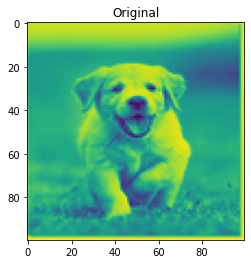

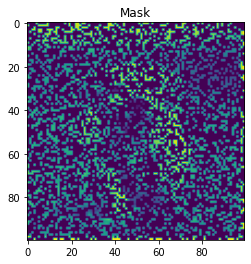

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import imageio
#%% Discrete Cosine Transform 
def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

#%% VARIABLES FOR YOU TO CHANGE
path_to_your_image=" "
zoom_out=0.9999999 #Fraction of the image you want to keep.
corruption=0.7#Fraction of the pixels that you want to discard
#%% Get image and create y
# read original image and downsize for speed
Xorig =imageio.imread('D:\SEM V\M4DS\Project\group2\group2\puppy.png', pilmode='L') # read in grayscale
#Downsize image 
X = spimg.zoom(Xorig, zoom_out)
ny,nx = X.shape

# extract small sample of signal
corruption=1-corruption
k = round(nx * ny * corruption) 
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
b = X.T.flat[ri]
b = np.expand_dims(b, axis=1)
#%% CREATE A inverse and C
# *******************************************************************************************
"""This part consumes a lot of memory. Your PC might crash if the images you load are larger than 100 x 100 pixels """
# create dct matrix operator using kron (memory errors for large ny*nx)
Aa = np.kron(
    np.float16(spfft.idct(np.identity(nx), norm='ortho', axis=0)),
    np.float16(spfft.idct(np.identity(ny), norm='ortho', axis=0))
    )
A = Aa[ri,:] # same as B times A
# *******************************************************************************************
# create images of mask (for visualization)
mask = np.zeros(X.shape)
mask.T.flat[ri] = True
mask[mask==0]=False
masked=X*mask
Xm = 255 * np.ones(X.shape)
Xm.T.flat[ri] = X.T.flat[ri]
#%%
plt.imshow(X)
plt.title("Original")
plt.show()

plt.imshow(masked)
plt.title("Mask")
plt.show()
#%% SAVE MATRICES TO DRIVE
import os
dir_name="Data For Assignment"
try:
    os.mkdir(dir_name)
except Exception as e:
    pass

np.save(dir_name+'/C',A)
np.save(dir_name+'/A_inv',Aa)
np.save(dir_name+'/y',b)
plt.imsave(dir_name+'/incomplete.png',Xm)
plt.imsave(dir_name+'/original_with_crop.png',X)